# New Section
Performing sentiment analysis using nltk and spacy 


In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [0]:
#Importing nltk and spacy library 
import nltk
import spacy

In [0]:
#Importing  corpus webtext 
from nltk.corpus import gutenberg

In [0]:
#importing Textblobl for tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, and translation.
from textblob import TextBlob as TB

In [0]:
#This will return a language object containing all components and data needed to process text
nlp = spacy.load('en')

In [0]:
#import library for computations and plot
import random
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#download the corpus gutenberg 

nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [0]:

emma = gutenberg.raw('austen-emma.txt')

In [0]:
#spacy function will perform the tokenization, lemmatizaton, pos, tagging, labelling etc.
parsed_emma = nlp(emma)


In [0]:
#This will do the random sampling of the text of size 100 
import re
sample_size = 100
my_sample = random.sample(list(parsed_emma.sents), sample_size)

In [0]:
#This will filter extra space, new line as well as other special character 
sample = []
for sent in parsed_emma.sents:
    #sent = sent.replace('--', ' ')
    sent = re.sub("\s+", " ", sent.text)
    sample.append(sent)

In [0]:
#This will match the token word for the PERSON property and filter out those tokens
persons_per_sentence = []
sentiments = []
for sent in sample:
    person_ents = []
    parsed_sentence = nlp(sent)
    tb_sentence = TB(sent)
    sentiment = tb_sentence.sentiment.polarity
    for ent in parsed_sentence.ents:
        if ent.label_ == 'PERSON' and ent.text not in person_ents:
            person_ents.append(ent.text)
    if len(person_ents) > 1: 
        persons_per_sentence.append(person_ents)
        sentiments.append(sentiment)

In [0]:
print(persons_per_sentence)
print(sentiments)


[['Miss Taylor', 'Woodhouse'], ['Miss Taylor', 'Emma', 'Taylor'], ['Emma', 'Weston', 'Taylor'], ['Weston', 'Taylor'], ['James', 'Randalls'], ['Knightley', 'Isabella'], ['Knightley', 'Isabella'], ['Woodhouse', 'Knightley'], ['Woodhouse', 'Taylor'], ['Knightley', 'Emma Woodhouse', 'Emma'], ['Emma', 'Knightley'], ['Knightley', 'Miss Taylor'], ['Emma', 'Knightley'], ['Taylor', "Farmer Mitchell's"], ['Miss Taylor', 'Weston'], ['Weston', 'Miss Taylor'], ['Weston', 'Churchill', 'Yorkshire'], ['Captain Weston', 'Miss Churchill of Enscombe'], ['Weston', 'Churchills'], ['Churchill', 'Frank'], ['Miss Taylor', 'Randalls'], ['Frank', 'Churchill'], ['Perry', 'Miss Bates'], ['Frank Churchill', 'Weston'], ['Weston', 'Emma', 'Miss Taylor'], ['Woodhouse', 'Taylor'], ['Taylor', 'Woodhouse'], ['Perry', 'Woodhouse'], ['Weston', 'Woodhouse'], ['Knightley', 'Elton', 'Woodhouse'], ['Miss Bates', 'Goddard', 'Woodhouse', 'James'], ['Emma', 'Weston'], ['Goddard', 'Smith'], ['Smith', 'Emma'], ['Emma', 'Knightley'

In [0]:
#This will create the array of person names along with +1 to -1 sentiment values based on the sentence polarity.
import itertools

relationships_counts = {}
sentiments_vals = {}

for (person_set, sentiment) in zip(persons_per_sentence, sentiments):
    for combo in itertools.combinations(person_set, 2):
        combo = tuple(sorted(combo))
        if combo not in relationships_counts:
            relationships_counts[combo] = 1
            sentiments_vals[combo] = [sentiment]
        else:
            relationships_counts[combo] +=1
            sentiments_vals[combo].append(sentiment)

In [0]:
print(relationships_counts)
print(sentiments_vals)

{('Miss Taylor', 'Woodhouse'): 2, ('Emma', 'Miss Taylor'): 3, ('Miss Taylor', 'Taylor'): 2, ('Emma', 'Taylor'): 2, ('Emma', 'Weston'): 63, ('Taylor', 'Weston'): 5, ('James', 'Randalls'): 1, ('Isabella', 'Knightley'): 5, ('Knightley', 'Woodhouse'): 17, ('Taylor', 'Woodhouse'): 4, ('Emma Woodhouse', 'Knightley'): 1, ('Emma', 'Knightley'): 48, ('Emma', 'Emma Woodhouse'): 1, ('Knightley', 'Miss Taylor'): 1, ("Farmer Mitchell's", 'Taylor'): 1, ('Miss Taylor', 'Weston'): 5, ('Churchill', 'Weston'): 6, ('Weston', 'Yorkshire'): 1, ('Churchill', 'Yorkshire'): 2, ('Captain Weston', 'Miss Churchill of Enscombe'): 1, ('Churchills', 'Weston'): 1, ('Churchill', 'Frank'): 4, ('Miss Taylor', 'Randalls'): 1, ('Miss Bates', 'Perry'): 1, ('Frank Churchill', 'Weston'): 12, ('Perry', 'Woodhouse'): 3, ('Weston', 'Woodhouse'): 19, ('Elton', 'Knightley'): 22, ('Elton', 'Woodhouse'): 9, ('Goddard', 'Miss Bates'): 1, ('Miss Bates', 'Woodhouse'): 2, ('James', 'Miss Bates'): 1, ('Goddard', 'Woodhouse'): 3, ('Godd

In [0]:
import numpy as np

In [0]:
#To plot the graph for sentiment values, need to average the sentiment values based on the names of the people. 
avg_sentiment = {k: np.mean(v) for k, v in sentiments_vals.items()}
rels = sorted(relationships_counts.items(), key=lambda kv: -kv[1]) 

In [0]:
import networkx as nx

G = nx.Graph()
edge_labels = []

rels_to_plot = 20
for rel in rels[:rels_to_plot]:
    #G.add_edge(rel[0][0], rel[0][1], weight=rel[1])
    #edge_labels.append(rel[1])
    G.add_edge(rel[0][0], rel[0][1], weight=avg_sentiment[rel[0]])
    edge_labels.append("{:.2f}".format(avg_sentiment[rel[0]]))
    print(rel[0], "{:.2f}".format(avg_sentiment[rel[0]]))

('Emma', 'Weston') 0.11
('Emma', 'Harriet') 0.19
('Emma', 'Knightley') 0.10
('Elton', 'Emma') 0.11
('Elton', 'Harriet') 0.15
('Emma', 'Woodhouse') 0.10
('Elton', 'Weston') 0.11
('Elton', 'Knightley') 0.20
('Weston', 'Woodhouse') 0.04
('Knightley', 'Woodhouse') 0.27
('Knightley', 'Weston') 0.21
('Emma', 'Frank Churchill') 0.16
('Elton', 'Jane') 0.08
('Bates', 'Emma') 0.07
('Harriet', 'Knightley') 0.11
('Emma', 'Jane') 0.20
('Emma', 'Isabella') 0.21
('Frank Churchill', 'Knightley') 0.33
('Frank Churchill', 'Weston') 0.25
('Emma', 'Jane Fairfax') 0.18


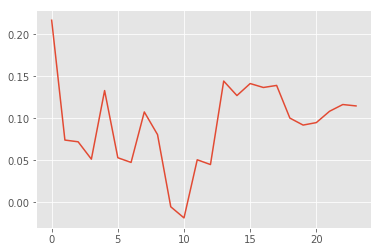

In [0]:
plt.plot(pd.Series(sentiments_vals[('Emma', 'Woodhouse')]).ewm(10).mean())

In [0]:
str_labels = {k: "{:.2f}".format(v) for k,v in avg_sentiment.items()}

KeyError: ignored

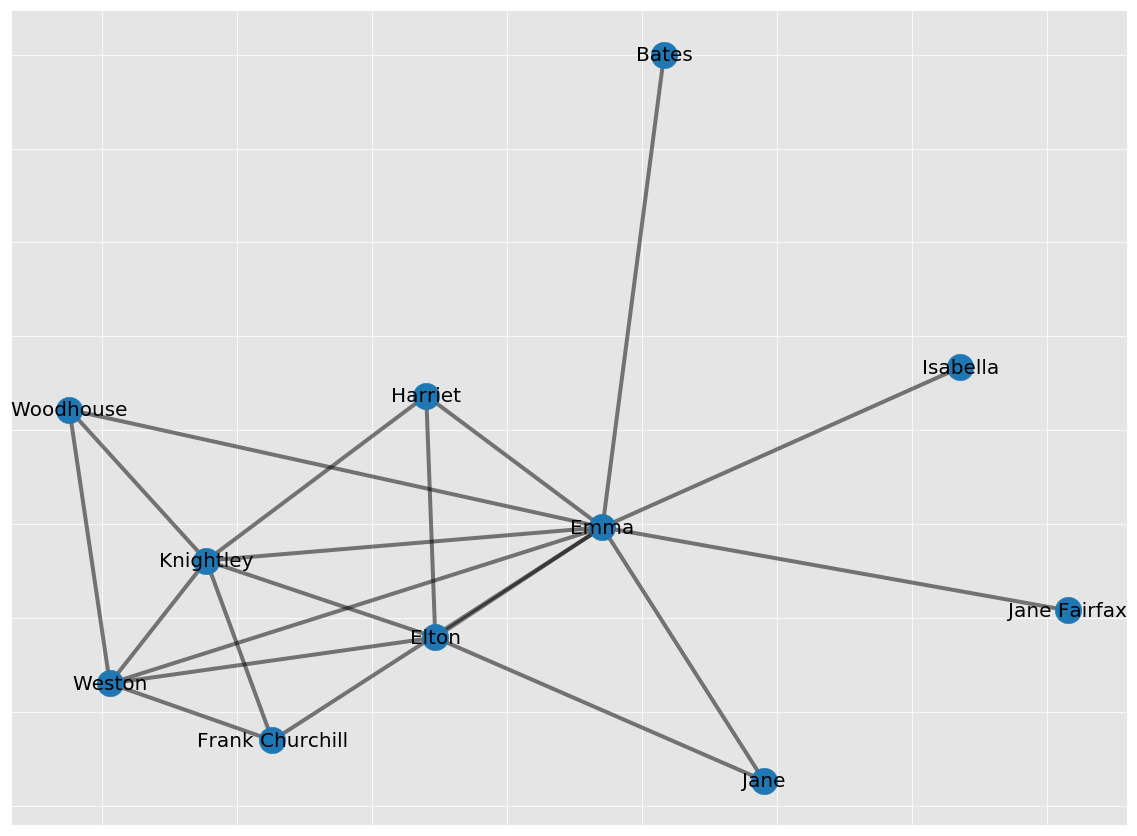

In [0]:
pos = nx.spring_layout(G)

plt.figure(figsize=(20, 15))

nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=4, alpha = 0.5)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif');

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=str_labels)
plt.show()


# New Section
Analysis of Fake news

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
all_news = pd.read_csv("fake.csv")
all_news.head(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias


In [0]:
print("Types and counts of stories", all_news.groupby(["type"]).size())

Types and counts of stories type
bias            443
bs            11492
conspiracy      430
fake             19
hate            246
junksci         102
satire          146
state           121
dtype: int64


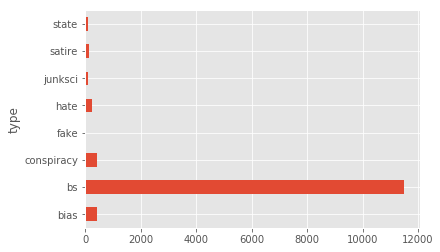

In [0]:
all_news.groupby(['type']).size().plot(kind='barh')

In [0]:
fake_news = all_news[all_news["type"] == "fake"]

In [0]:
import nltk

# Fill any blank fields
fake_news.title.fillna("", inplace=True)
fake_news.text.fillna("", inplace=True)

# Join the title and text
all_text = fake_news.title.str.cat(fake_news.text, sep=' ')

# Tokenize. The NLTK tokenizer isn't awesome. Spacy has a nice one, but I don't think it is installed
#words = nltk.word_tokenize(" ".join(all_text.tolist()))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


This is a Fake news Demo which is done to demo n grams (bi grams) to show 

In [0]:

import nltk
nltk.download('punkt')
words = nltk.word_tokenize(" ".join(all_text.tolist()))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
fake_news.head(5)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
57,8a35883f9c9f0b15a9e20ab8711d403d91d57405,0,Jimmy Rustling,2016-10-27T13:00:00.000+03:00,The Amish In America Commit Their Vote To Dona...,18 SHARE The Amish in America have committed t...,english,2016-10-27T15:50:22.818+03:00,abcnews.com.co,CO,65078.0,The Amish In America Commit Their Vote To Dona...,0.000,http://abcnews.com.co/wp-content/uploads/2016/...,0,0,0,0,0,fake
58,c6fb8dae30e3d378935e910540a0cb99b5351ac0,0,Jimmy Rustling,2016-11-11T12:00:00.000+02:00,Obama Signs Executive Order Declaring Investig...,64 SHARE President Obama has signed an Executi...,english,2016-11-11T16:33:32.484+02:00,abcnews.com.co,US,65078.0,Obama Signs Executive Order Declaring Investig...,0.009,http://abcnews.com.co/wp-content/uploads/2016/...,0,0,0,0,0,fake
379,504e8fa4469d75f8d22984220568e3313c74a1b7,0,"Day of the Dead 2015: History, food and reflec...",2016-10-27T05:18:00.000+03:00,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,"adobochron 10 Comments \nSan Francisco, Califo...",english,2016-10-27T07:25:28.782+03:00,adobochronicles.com,US,NaN,Comment on HALLOWEEN IN THE CASTRO RETURNS IN ...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
380,20e1a45f760f8db5f26207bbfe827bf8cd6d65bb,0,Ivan Jose,2016-10-27T09:18:46.193+03:00,Comment on Tutorial: Riding The Philippine Jee...,"adobochron 1 Comment \nMANILA, Philippines (Th...",english,2016-10-27T09:18:46.193+03:00,adobochronicles.com,US,NaN,Comment on Tutorial: Riding The Philippine Jee...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake
381,9874fcff14d4af3c13954116c55590b28a5b98b8,0,Tony Rabon,2016-10-28T19:56:09.149+03:00,Comment on What White House Executive Chef Com...,"adobochron 1 Comment Comerford \nWASHINGTON, D...",english,2016-10-28T19:56:09.149+03:00,adobochronicles.com,US,NaN,Comment on What White House Executive Chef Com...,0.000,https://adobochroniclesdotcom.files.wordpress....,0,1,0,0,0,fake


In [0]:
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

# clearly more cleaning is needed here, but really I should get a better tokenizer
stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


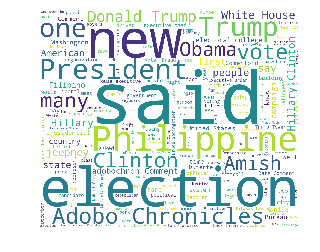

In [0]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cleanwords))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [0]:
from collections import Counter

#Most common collocations
bigrams = nltk.bigrams(cleanwords)
counter = Counter(bigrams)
print(counter.most_common(20))

[(('The', 'Adobo'), 20), (('Adobo', 'Chronicles'), 20), (('Donald', 'Trump'), 16), (('White', 'House'), 15), (('Hillary', 'Clinton'), 13), (('electoral', 'college'), 10), (('United', 'States'), 9), (('The', 'Resistance'), 8), (('Rate', 'Comment'), 7), (('adobochron', 'Comment'), 6), (('Trump', 'Tower'), 6), (('adobochron', 'Comments'), 5), (('Melania', 'Trump'), 5), (('Leftist', 'Corruption'), 5), (('Bruce', 'Springsteen'), 5), (('The', 'Amish'), 4), (('Executive', 'Order'), 4), (('poll', 'workers'), 4), (('president', 'United'), 4), (('Philippines', 'The'), 4)]


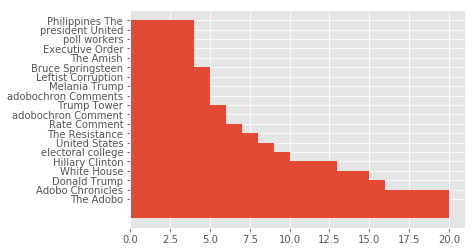

In [0]:
#plotting the most common collocatons
num_to_show = 20

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 2
plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.5, labels)
plt.show()